In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnx_chem_bioreachable.csv')
df = df.dropna(subset='SMILES')
smi_list = df['SMILES'].values.tolist()
smi_list = list(set(smi_list))
mol_list = [Chem.MolFromSmiles(smi) for smi in tqdm(smi_list)]

100%|██████████| 26832/26832 [00:11<00:00, 2364.27it/s]


In [3]:
descriptors = {
    'Molecular Weight': [Descriptors.ExactMolWt(mol) for mol in tqdm(mol_list)],
    'LogP': [Descriptors.MolLogP(mol) for mol in tqdm(mol_list)],
    'Molecular MR?': [Descriptors.MolMR(mol) for mol in tqdm(mol_list)],
    '# H Acceptors': [Descriptors.NumHAcceptors(mol) for mol in tqdm(mol_list)],
    '# H Donors': [Descriptors.NumHDonors(mol) for mol in tqdm(mol_list)],
    '# Rings': [Descriptors.RingCount(mol) for mol in tqdm(mol_list)],
    'TPSA?': [Descriptors.TPSA(mol) for mol in tqdm(mol_list)],
    'QED?': [Descriptors.qed(mol) for mol in tqdm(mol_list)],
}

100%|██████████| 26832/26832 [01:28<00:00, 302.41it/s]


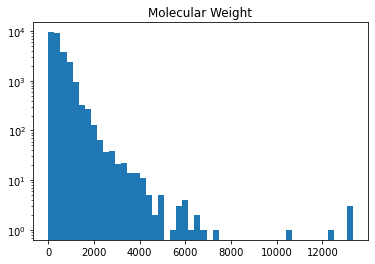

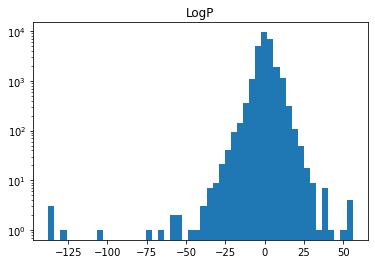

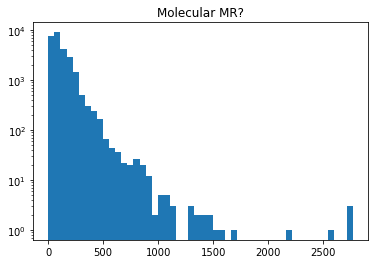

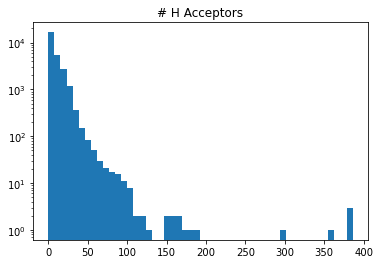

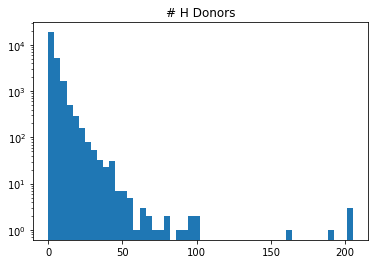

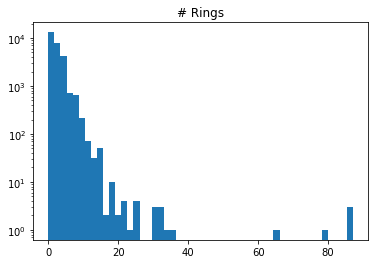

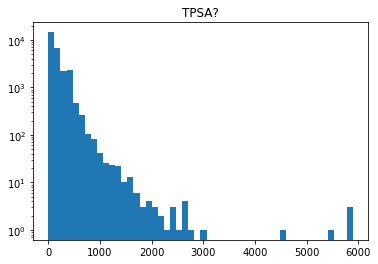

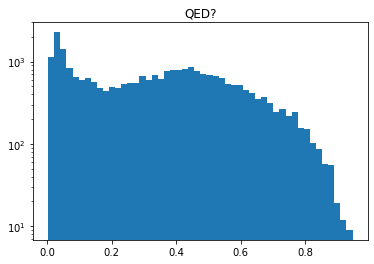

In [4]:
for key in descriptors.keys():
    plt.hist(descriptors[key], bins=50)
    plt.yscale('log')
    plt.title(key)
    plt.show()